In [2]:
from pathlib import Path
import pandas as pd

# Raíz del proyecto (debería ser la carpeta runway-trend-intelligence)
# Empezamos en el cwd y buscamos hacia arriba hasta encontrar data/master_metadata_initial.csv
PROJECT_ROOT = Path.cwd().resolve()
print("Initial cwd:", PROJECT_ROOT)

metadata_rel = Path("data") / "master_metadata_initial.csv"
search_root = PROJECT_ROOT
metadata_path = None

for _ in range(6):  # buscar hasta 6 niveles hacia arriba
	candidate = search_root / metadata_rel
	if candidate.exists():
		PROJECT_ROOT = search_root
		metadata_path = candidate
		break
	if search_root.parent == search_root:
		break
	search_root = search_root.parent

if metadata_path is None:
	raise FileNotFoundError(f"{metadata_rel} not found under {PROJECT_ROOT} or its parents")

print("Project root:", PROJECT_ROOT)
print("Metadata path:", metadata_path)

df = pd.read_csv(metadata_path)

df.head()


Initial cwd: /Users/fernandavasquez/runway-trend-intelligence/notebooks
Project root: /Users/fernandavasquez/runway-trend-intelligence
Metadata path: /Users/fernandavasquez/runway-trend-intelligence/data/master_metadata_initial.csv


,image_id,source,original_dataset,image_path
0,runway_fashion_runway_images_refined_86968_jpg...,runway,fashion_runway_images_refined,data/runway/fashion_runway_images_refined/vali...
1,runway_fashion_runway_images_refined_87313_jpg...,runway,fashion_runway_images_refined,data/runway/fashion_runway_images_refined/vali...
2,runway_fashion_runway_images_refined_87168_jpg...,runway,fashion_runway_images_refined,data/runway/fashion_runway_images_refined/vali...
3,runway_fashion_runway_images_refined_8530_jpg....,runway,fashion_runway_images_refined,data/runway/fashion_runway_images_refined/vali...
4,runway_fashion_runway_images_refined_15535_jpg...,runway,fashion_runway_images_refined,data/runway/fashion_runway_images_refined/vali...


In [3]:
len(df), df["source"].value_counts()


(4491,
 source
 runway    2780
 street    1711
 Name: count, dtype: int64)

# Mostrar imagenes de ambos datasets

In [5]:
from PIL import Image
import matplotlib.pyplot as plt

def show_samples(df_subset, n=6, title="Samples"):
    """Muestra n imágenes random de un subset del DataFrame."""
    sample = df_subset.sample(n)
    n_cols = 3
    n_rows = (n + n_cols - 1) // n_cols

    plt.figure(figsize=(4 * n_cols, 4 * n_rows))
    plt.suptitle(title, fontsize=16)

    for i, (_, row) in enumerate(sample.iterrows(), start=1):
        img_path = PROJECT_ROOT / row["image_path"]
        img = Image.open(img_path).convert("RGB")

        plt.subplot(n_rows, n_cols, i)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"{row['source']}")

    plt.tight_layout()
    plt.show()


In [6]:
# runway
runway_df = df[df["source"] == "runway"]
len(runway_df)


2780

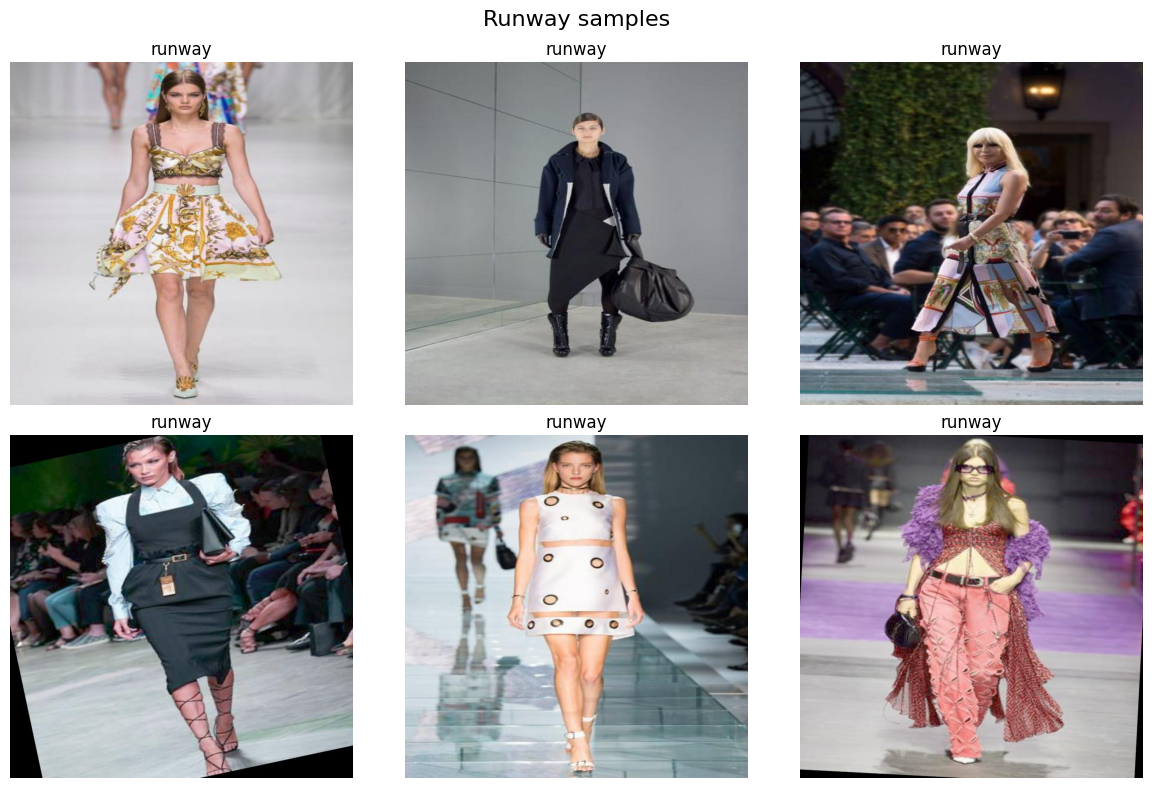

In [7]:
show_samples(runway_df, n=6, title="Runway samples")


In [8]:
street_df = df[df["source"] == "street"]
len(street_df)


1711

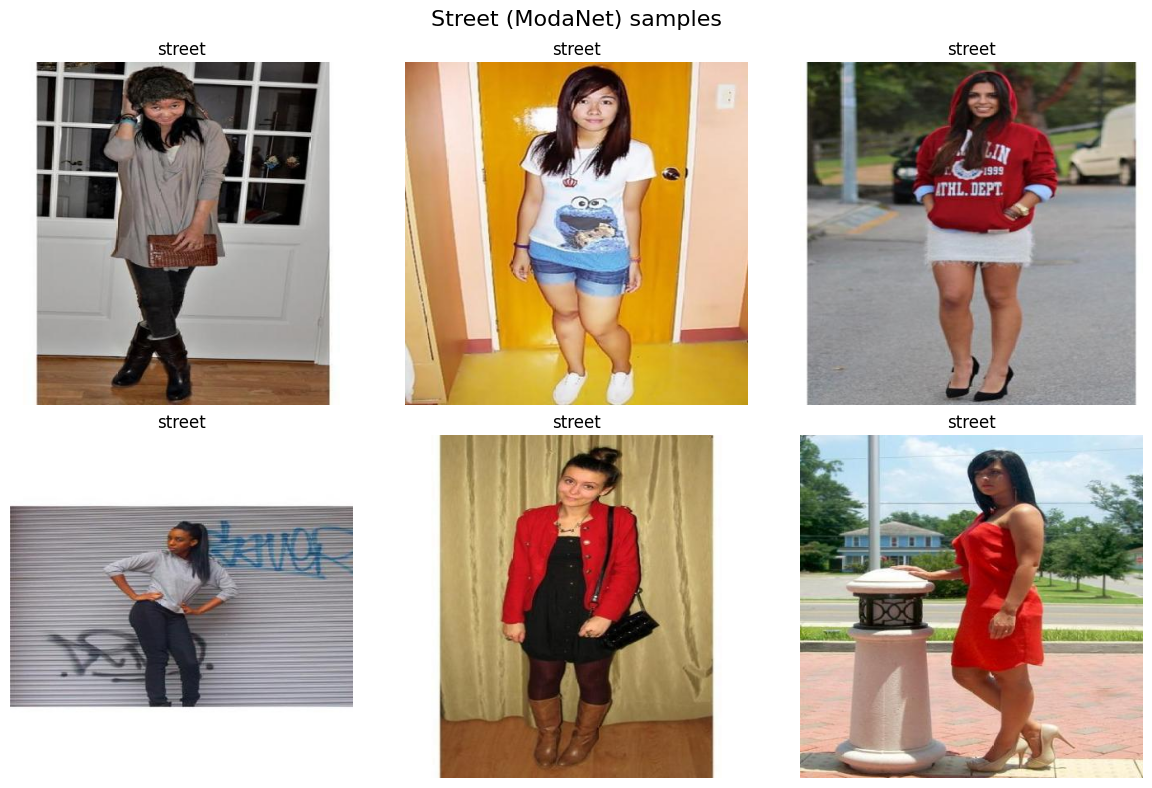

In [9]:
show_samples(street_df, n=6, title="Street (ModaNet) samples")


# EDA!

In [10]:
df["original_dataset"].value_counts()


original_dataset
fashion_runway_images_refined    2780
modanet                          1711
Name: count, dtype: int64

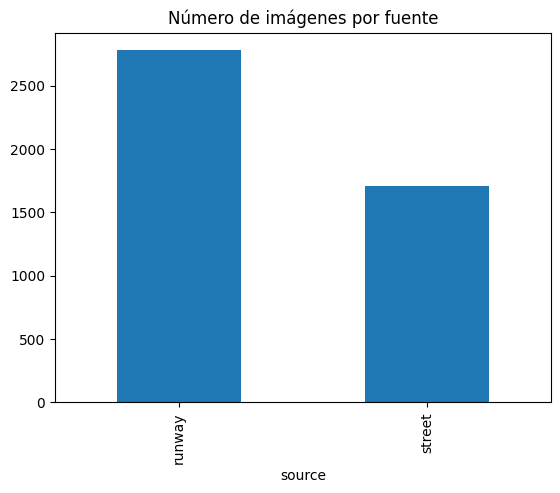

In [11]:
df.groupby("source")["image_id"].count().plot(kind="bar");
plt.title("Número de imágenes por fuente");
plt.show()
